In [1]:
import matplotlib.pyplot as plt
from Functions_plotting import c1,c2,c3,c4,c5
import numpy as np

In [53]:
# Yield bar plot
def yield_boxandwhisker(Xs,ax,Ys,col_type,linestyles):
        
    # Set linestyles
    if linestyles == True:
        # Set design
        if col_type != 4:
            ls = ['--','-',':','-.']
        else:
            ls = [':','--','-','-.']
    # Don't set linestyles
    elif linestyles == False:
        # Set design
        if col_type != 4:
            ls = [':','-',':',':']
        else:
            ls = [':',':','-',':']
            
    # Set colours
    if col_type == 1:
        cols = [c4,c5,c4]
    elif col_type == 2:
        cols = [c4,c5,c4,c4]
    elif col_type == 3:
        cols = [c4,c5,c4]
    elif col_type == 4:
        cols = [c4,c4,c5]
        
    # Plot vertical line (tag if plot 1 for the legend)
    if col_type == 1:
        ax.plot([np.mean(Xs),np.mean(Xs)],[np.min(Ys),np.max(Ys)],color=c4,linewidth=10,alpha=0.4,solid_capstyle='butt',label = "All possible outcomes")
    elif col_type in [2,3]:
        ax.plot([np.mean(Xs),np.mean(Xs)],[np.min(Ys),np.max(Ys)],color=c4,linewidth=10,alpha=0.4,solid_capstyle='butt')

    # Plot yield horizontal lines   
    for i in range(len(Ys)):
        ax.plot(Xs,[Ys[i],Ys[i]],color=cols[i],linestyle=ls[i],linewidth=3)
        
    # If poster version, add a legend
    if linestyles == False:
        ax.legend(["Range","Boundary values", "Default value"],loc = "upper right")
    
    return ax

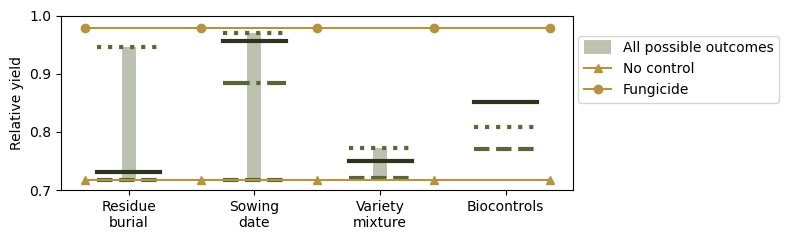

In [61]:
# Copy and paste the yields which were output in each of Fitting_1...4
Y1 = [0.7213411004686073, 0.749334309958344, 0.7726474347614888]
Y2 = [0.7172895172657651, 0.9568669764410591, 0.969568094600089, 0.8836329953868599]
Y3 = [0.7172895244366988, 0.7307733424534126, 0.9462224362097315]
Y4 = [0.8088212948934402, 0.7711544243330894, 0.8512486622241164]


# Decide whether I want the different linestyles, or just a plain box and whisker
def linestyles(paper):
    fig,ax = plt.subplots(1,figsize=(8,2.5))

    # Order needs to be 3, 2, 1, 4
    ax = yield_boxandwhisker([0,0.5],ax,Y3,3,paper)
    ax = yield_boxandwhisker([1,1.5],ax,Y2,2,paper)
    ax = yield_boxandwhisker([2,2.5],ax,Y1,1,paper)
    ax = yield_boxandwhisker([3,3.5],ax,Y4,4,paper)
    ax.set_ylim([0.7,1])
    ax.set_ylabel("Relative yield",fontsize='10')

    # Order needs to be 3, 2, 1, 4
    labels = ["Residue\nburial", "Sowing\ndate","Variety\nmixture" , "Biocontrols"]
    xcoords = [0.25,1.25,2.25,3.25]
    
    # Plot no control and fungicide if required
    if paper == True:
#         ax.plot([-2,-1.5],[0.717]*2,color=c2,linestyle='-',linewidth=3)
#         ax.scatter([-1.75],[0.717],marker='^',c=c2,s=50)
#         ax.plot([-1,-0.5],[0.978]*2,color=c2,linestyle='-',linewidth=3)
#         ax.scatter([-0.75],[0.978],marker='o',c=c2,s=50)
#         labels = ["No control", "Fungicide"]+labels
#         xcoords = [-1.75,-0.75] + xcoords
        n = 5
        ax.plot(np.linspace(-0.1,3.6,n),[0.717]*n,color=c2,linestyle='-',linewidth=1.5,marker='^',label="No control")
        ax.plot(np.linspace(-0.1,3.6,n),[0.978]*n,color=c2,linestyle='-',linewidth=1.5,marker='o',label="Fungicide")
    
    plt.legend(loc = [1.01,0.5])
    
    ax.set_xticks(xcoords,labels = labels,fontsize='10')
    ax.set_yticks(ax.get_yticks(),np.round(ax.get_yticks(),2),fontsize='10')
    plt.tight_layout()
    return fig

# Run the version for paper
fig = linestyles(True)
fig.savefig('Figures/Manuscript_final/fig_1controlyields.pdf', dpi=400)

# # Run the version for poster
# fig = linestyles(False)
# fig.savefig('Figures/fig_1controlyields_poster.pdf', dpi=400)